In [1]:
import numpy as np
import math
from sklearn.metrics import multilabel_confusion_matrix, roc_auc_score, average_precision_score
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Non-effector', 'T1SE', 'T2SE', 'T3SE', 'T4SE', 'T6SE']
model_to_color = {
    "pssm-cnn":"#c6cccc",
    "tape-linear":"#F5C1CB",
    "esm1b-linear":"#e38690",
    "esm1b-finetune":"#00b3ca",
    "DeepSecE":"#7dd0b6"
}

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['legend.title_fontsize'] = 11
mpl.rcParams['legend.fontsize'] = 11
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11

pd.options.display.float_format = '{:.3f}'.format


Display evaluation metrics for each class by different model architectures in cross-validation.

In [2]:
valid_results = {}

for model_name in ['pssm-cnn','tape-linear', 'esm1b-linear', 'esm1b-finetune', 'DeepSecE']:
    mode = 'valid'
    labels = ['Non-effector', 'T1SE', 'T2SE', 'T3SE', 'T4SE', 'T6SE']
    df = pd.DataFrame({'Label':[], 'Accuracy': [], 'Sensitivity': [], 'Specificity': [],
                    'Precision': [], 'F1-score': [], 'MCC': [], 'AUC': [], 'AUPRC': []})

    for idx in range(5):
        y = np.load(f'{model_name}/y_{mode}_{idx+1}.npy')
        pred = np.load(f'{model_name}/pred_{mode}_{idx+1}.npy')
        prob = np.load(f'{model_name}/prob_{mode}_{idx+1}.npy')
        cms = multilabel_confusion_matrix(y, pred)
        for i, (cm, label) in enumerate(zip(cms, labels)):
            TP = cm[1, 1]
            TN = cm[0, 0]
            FP = cm[0, 1]
            FN = cm[1, 0]
            accuracy = (TP+TN) / (TP+TN+FP+FN)
            sensitivity = TP / (TP+FN)
            specificity = TN / (TN+FP)
            precision = TP / (TP+FP)
            f1 = 2*sensitivity*precision/(sensitivity+precision)
            mcc = (TP*TN-FP*FN)/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
            auc = roc_auc_score(y == i, prob[:, i])
            auprc =  average_precision_score(y == i, prob[:, i])

            df = df.append({'Label': label, 'Accuracy': accuracy, 'Sensitivity': sensitivity, 'Specificity': specificity,
                        'Precision': precision, 'F1-score': f1, 'MCC': mcc, 'AUC': auc, 'AUPRC': auprc},
                            ignore_index=True)
            
    valid_results[model_name] = df
    
    print(f'Model: {model_name}\t Mode: {mode}')
    display(df.groupby('Label').agg(['mean', 'std']))

Model: pssm-cnn	 Mode: valid


Accuracy       Sensitivity       Specificity       Precision  \
                 mean   std        mean   std        mean   std      mean   
Label                                                                       
Non-effector    0.870 0.018       0.903 0.009       0.831 0.046     0.864   
T1SE            0.987 0.006       0.813 0.061       0.995 0.005     0.888   
T2SE            0.980 0.005       0.382 0.133       0.994 0.003     0.622   
T3SE            0.925 0.014       0.721 0.063       0.958 0.024     0.752   
T4SE            0.885 0.016       0.661 0.039       0.932 0.019     0.678   
T6SE            0.951 0.005       0.647 0.098       0.978 0.006     0.717   

                   F1-score         MCC         AUC       AUPRC        
               std     mean   std  mean   std  mean   std  mean   std  
Label                                                                  
Non-effector 0.031    0.883 0.014 0.738 0.035 0.928 0.011 0.920 0.017  
T1SE         0.101    0.847 0.066 0.842 0.070 0.958 0.036 0.896 0.066  
T2SE         0.182    0.468 0.140 0.475 0.143 0.935 0.049 0.475 0.163  
T3SE         0.108    0.729 0.027 0.691 0.039 0.926 0.011 0.800 0.035  
T4SE         0.067    0.667 0.036 0.599 0.047 0.880 0.030 0.704 0.037  
T6SE         0.035    0.676 0.051 0.653 0.051 0.912 0.059 0.716 0.098

Model: tape-linear	 Mode: valid


Accuracy       Sensitivity       Specificity       Precision  \
                 mean   std        mean   std        mean   std      mean   
Label                                                                       
Non-effector    0.867 0.015       0.906 0.018       0.822 0.029     0.857   
T1SE            0.992 0.004       0.859 0.066       0.998 0.002     0.949   
T2SE            0.987 0.004       0.570 0.201       0.996 0.002     0.801   
T3SE            0.931 0.011       0.719 0.028       0.965 0.010     0.773   
T4SE            0.901 0.010       0.696 0.097       0.944 0.009     0.724   
T6SE            0.954 0.016       0.680 0.098       0.977 0.010     0.725   

                   F1-score         MCC         AUC       AUPRC        
               std     mean   std  mean   std  mean   std  mean   std  
Label                                                                  
Non-effector 0.019    0.880 0.013 0.733 0.029 0.928 0.009 0.924 0.013  
T1SE         0.048    0.901 0.049 0.898 0.050 0.976 0.024 0.927 0.038  
T2SE         0.100    0.650 0.147 0.661 0.134 0.970 0.018 0.689 0.112  
T3SE         0.055    0.744 0.035 0.706 0.041 0.926 0.015 0.789 0.024  
T4SE         0.014    0.707 0.055 0.649 0.055 0.900 0.028 0.756 0.038  
T6SE         0.115    0.701 0.102 0.677 0.111 0.921 0.041 0.729 0.114

Model: esm1b-linear	 Mode: valid


Accuracy       Sensitivity       Specificity       Precision  \
                 mean   std        mean   std        mean   std      mean   
Label                                                                       
Non-effector    0.912 0.010       0.957 0.016       0.859 0.014     0.889   
T1SE            0.994 0.002       0.890 0.035       0.999 0.002     0.976   
T2SE            0.989 0.005       0.689 0.166       0.996 0.003     0.830   
T3SE            0.948 0.007       0.800 0.027       0.972 0.009     0.825   
T4SE            0.929 0.014       0.738 0.035       0.969 0.013     0.835   
T6SE            0.979 0.006       0.802 0.049       0.994 0.005     0.924   

                   F1-score         MCC         AUC       AUPRC        
               std     mean   std  mean   std  mean   std  mean   std  
Label                                                                  
Non-effector 0.010    0.922 0.009 0.825 0.021 0.961 0.005 0.956 0.007  
T1SE         0.035    0.930 0.019 0.929 0.019 0.973 0.021 0.930 0.025  
T2SE         0.150    0.745 0.133 0.747 0.133 0.987 0.011 0.799 0.108  
T3SE         0.047    0.812 0.024 0.782 0.028 0.952 0.010 0.875 0.027  
T4SE         0.059    0.783 0.039 0.743 0.049 0.936 0.008 0.836 0.049  
T6SE         0.065    0.857 0.042 0.849 0.046 0.961 0.022 0.887 0.050

Model: esm1b-finetune	 Mode: valid


Accuracy       Sensitivity       Specificity       Precision  \
                 mean   std        mean   std        mean   std      mean   
Label                                                                       
Non-effector    0.908 0.012       0.941 0.021       0.870 0.020     0.895   
T1SE            0.994 0.002       0.914 0.034       0.998 0.002     0.953   
T2SE            0.988 0.003       0.735 0.112       0.994 0.003     0.774   
T3SE            0.955 0.006       0.825 0.032       0.976 0.005     0.849   
T4SE            0.931 0.009       0.759 0.055       0.968 0.018     0.840   
T6SE            0.978 0.005       0.819 0.050       0.991 0.004     0.894   

                   F1-score         MCC         AUC       AUPRC        
               std     mean   std  mean   std  mean   std  mean   std  
Label                                                                  
Non-effector 0.013    0.917 0.011 0.817 0.025 0.959 0.007 0.954 0.005  
T1SE         0.032    0.932 0.018 0.930 0.019 0.969 0.017 0.929 0.025  
T2SE         0.140    0.745 0.076 0.744 0.081 0.989 0.008 0.788 0.145  
T3SE         0.027    0.836 0.021 0.811 0.024 0.961 0.009 0.902 0.023  
T4SE         0.072    0.794 0.022 0.757 0.028 0.943 0.010 0.865 0.035  
T6SE         0.047    0.854 0.036 0.843 0.039 0.954 0.028 0.884 0.055

Model: DeepSecE	 Mode: valid


Accuracy       Sensitivity       Specificity       Precision  \
                 mean   std        mean   std        mean   std      mean   
Label                                                                       
Non-effector    0.914 0.012       0.959 0.016       0.861 0.018     0.890   
T1SE            0.994 0.003       0.898 0.045       0.998 0.001     0.958   
T2SE            0.990 0.005       0.719 0.167       0.996 0.003     0.818   
T3SE            0.960 0.006       0.786 0.057       0.988 0.007     0.914   
T4SE            0.934 0.012       0.781 0.020       0.966 0.016     0.831   
T6SE            0.975 0.010       0.793 0.049       0.990 0.007     0.880   

                   F1-score         MCC         AUC       AUPRC        
               std     mean   std  mean   std  mean   std  mean   std  
Label                                                                  
Non-effector 0.012    0.923 0.011 0.828 0.024 0.961 0.007 0.957 0.006  
T1SE         0.028    0.927 0.035 0.924 0.036 0.970 0.020 0.925 0.035  
T2SE         0.144    0.759 0.134 0.759 0.136 0.991 0.009 0.814 0.180  
T3SE         0.043    0.843 0.029 0.825 0.031 0.956 0.012 0.901 0.030  
T4SE         0.067    0.804 0.029 0.766 0.038 0.947 0.006 0.868 0.034  
T6SE         0.088    0.834 0.060 0.822 0.067 0.967 0.022 0.885 0.051

Display evaluation metrics for each class by different model architectures in independent test.

In [3]:
test_results = {}

for model_name in ['pssm-cnn','tape-linear', 'esm1b-linear', 'esm1b-finetune', 'DeepSecE']:
    mode = 'test'
    labels = ['Non-effector', 'T1SE', 'T2SE', 'T3SE', 'T4SE', 'T6SE']
    df = pd.DataFrame({'Label': [], 'Accuracy': [], 'Sensitivity': [], 'Specificity': [],
                       'Precision': [], 'F1-score': [], 'MCC': [], 'AUC': [], 'AUPRC': []})

    for idx in range(5):
        y = np.load(f'{model_name}/y_{mode}_{idx+1}.npy')
        pred = np.load(f'{model_name}/pred_{mode}_{idx+1}.npy')
        prob = np.load(f'{model_name}/prob_{mode}_{idx+1}.npy')
        cms = multilabel_confusion_matrix(y, pred)
        for i, (cm, label) in enumerate(zip(cms, labels)):
            TP = cm[1, 1]
            TN = cm[0, 0]
            FP = cm[0, 1]
            FN = cm[1, 0]
            accuracy = (TP+TN) / (TP+TN+FP+FN)
            sensitivity = TP / (TP+FN)
            specificity = TN / (TN+FP)
            precision = TP / (TP+FP)
            f1 = 2*sensitivity*precision/(sensitivity+precision)
            mcc = (TP*TN-FP*FN)/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
            auc = roc_auc_score(y == i, prob[:, i])
            auprc = average_precision_score(y == i, prob[:, i])

            df = df.append({'Label': label, 'Accuracy': accuracy, 'Sensitivity': sensitivity, 'Specificity': specificity,
                            'Precision': precision, 'F1-score': f1, 'MCC': mcc, 'AUC': auc, 'AUPRC': auprc},
                           ignore_index=True)

    test_results[model_name] = df
    print(f'Model: {model_name}\t Mode: {mode}')
    display(df.groupby('Label').agg(['mean', 'std']))


Model: pssm-cnn	 Mode: test


Accuracy       Sensitivity       Specificity       Precision  \
                 mean   std        mean   std        mean   std      mean   
Label                                                                       
Non-effector    0.886 0.016       0.869 0.033       0.909 0.014     0.929   
T1SE            0.975 0.002       0.810 0.042       0.988 0.002     0.853   
T2SE            0.962 0.003       0.380 0.148       0.985 0.007     0.503   
T3SE            0.952 0.014       0.827 0.055       0.969 0.017     0.785   
T4SE            0.915 0.012       0.767 0.075       0.934 0.015     0.606   
T6SE            0.954 0.003       0.770 0.097       0.969 0.008     0.679   

                   F1-score         MCC         AUC       AUPRC        
               std     mean   std  mean   std  mean   std  mean   std  
Label                                                                  
Non-effector 0.009    0.898 0.016 0.772 0.028 0.952 0.003 0.964 0.004  
T1SE         0.017    0.830 0.018 0.817 0.019 0.987 0.003 0.863 0.018  
T2SE         0.045    0.420 0.098 0.412 0.087 0.919 0.013 0.481 0.046  
T3SE         0.093    0.802 0.049 0.777 0.056 0.938 0.009 0.869 0.030  
T4SE         0.053    0.674 0.042 0.634 0.049 0.929 0.016 0.676 0.042  
T6SE         0.032    0.718 0.031 0.697 0.036 0.973 0.009 0.789 0.048

Model: tape-linear	 Mode: test


Accuracy       Sensitivity       Specificity       Precision  \
                 mean   std        mean   std        mean   std      mean   
Label                                                                       
Non-effector    0.894 0.011       0.847 0.027       0.958 0.014     0.965   
T1SE            0.978 0.004       0.810 0.065       0.993 0.003     0.902   
T2SE            0.968 0.003       0.620 0.164       0.982 0.004     0.571   
T3SE            0.935 0.012       0.927 0.015       0.937 0.011     0.657   
T4SE            0.949 0.010       0.793 0.049       0.970 0.010     0.776   
T6SE            0.951 0.002       0.840 0.022       0.960 0.004     0.637   

                   F1-score         MCC         AUC       AUPRC        
               std     mean   std  mean   std  mean   std  mean   std  
Label                                                                  
Non-effector 0.010    0.902 0.012 0.796 0.018 0.959 0.005 0.971 0.004  
T1SE         0.038    0.852 0.035 0.843 0.035 0.980 0.004 0.865 0.024  
T2SE         0.026    0.588 0.085 0.575 0.091 0.982 0.004 0.588 0.023  
T3SE         0.042    0.769 0.034 0.747 0.037 0.962 0.006 0.893 0.017  
T4SE         0.056    0.783 0.037 0.755 0.042 0.971 0.011 0.827 0.037  
T6SE         0.017    0.724 0.002 0.706 0.000 0.975 0.007 0.788 0.037

Model: esm1b-linear	 Mode: test


Accuracy       Sensitivity       Specificity       Precision  \
                 mean   std        mean   std        mean   std      mean   
Label                                                                       
Non-effector    0.915 0.015       0.888 0.025       0.953 0.004     0.962   
T1SE            0.983 0.002       0.830 0.027       0.996 0.000     0.943   
T2SE            0.961 0.003       0.700 0.000       0.971 0.003     0.494   
T3SE            0.935 0.013       0.947 0.030       0.934 0.014     0.654   
T4SE            0.968 0.007       0.833 0.024       0.985 0.007     0.882   
T6SE            0.978 0.005       0.800 0.000       0.993 0.005     0.902   

                   F1-score         MCC         AUC       AUPRC        
               std     mean   std  mean   std  mean   std  mean   std  
Label                                                                  
Non-effector 0.004    0.924 0.014 0.833 0.028 0.979 0.003 0.984 0.002  
T1SE         0.002    0.883 0.016 0.876 0.016 0.996 0.003 0.970 0.008  
T2SE         0.030    0.579 0.020 0.569 0.019 0.968 0.007 0.457 0.040  
T3SE         0.048    0.773 0.038 0.754 0.040 0.981 0.003 0.938 0.011  
T4SE         0.045    0.856 0.028 0.839 0.032 0.992 0.002 0.957 0.012  
T6SE         0.062    0.847 0.028 0.838 0.032 0.988 0.001 0.922 0.010

Model: esm1b-finetune	 Mode: test


Accuracy       Sensitivity       Specificity       Precision  \
                 mean   std        mean   std        mean   std      mean   
Label                                                                       
Non-effector    0.876 0.010       0.813 0.021       0.962 0.012     0.967   
T1SE            0.985 0.002       0.870 0.027       0.995 0.002     0.936   
T2SE            0.952 0.006       0.760 0.089       0.959 0.005     0.428   
T3SE            0.942 0.006       0.967 0.000       0.939 0.007     0.675   
T4SE            0.968 0.009       0.947 0.045       0.971 0.009     0.814   
T6SE            0.976 0.009       0.830 0.027       0.988 0.010     0.867   

                   F1-score         MCC         AUC       AUPRC        
               std     mean   std  mean   std  mean   std  mean   std  
Label                                                                  
Non-effector 0.010    0.883 0.011 0.767 0.017 0.975 0.004 0.979 0.006  
T1SE         0.020    0.901 0.012 0.895 0.013 0.996 0.002 0.970 0.010  
T2SE         0.039    0.546 0.050 0.548 0.057 0.974 0.005 0.530 0.037  
T3SE         0.025    0.795 0.017 0.779 0.017 0.981 0.003 0.953 0.005  
T4SE         0.045    0.874 0.033 0.860 0.037 0.993 0.003 0.955 0.026  
T6SE         0.097    0.845 0.045 0.834 0.049 0.976 0.016 0.911 0.030

Model: DeepSecE	 Mode: test


Accuracy       Sensitivity       Specificity       Precision  \
                 mean   std        mean   std        mean   std      mean   
Label                                                                       
Non-effector    0.918 0.012       0.889 0.018       0.958 0.015     0.967   
T1SE            0.994 0.002       0.920 0.027       1.000 0.000     1.000   
T2SE            0.955 0.008       0.720 0.110       0.964 0.009     0.450   
T3SE            0.972 0.005       0.953 0.018       0.974 0.004     0.827   
T4SE            0.976 0.005       0.967 0.000       0.977 0.006     0.849   
T6SE            0.981 0.003       0.840 0.042       0.993 0.006     0.910   

                   F1-score         MCC         AUC       AUPRC        
               std     mean   std  mean   std  mean   std  mean   std  
Label                                                                  
Non-effector 0.012    0.926 0.011 0.839 0.023 0.980 0.003 0.985 0.003  
T1SE         0.000    0.958 0.015 0.956 0.015 0.997 0.004 0.983 0.018  
T2SE         0.057    0.550 0.053 0.546 0.059 0.970 0.009 0.459 0.042  
T3SE         0.025    0.886 0.020 0.872 0.022 0.978 0.005 0.953 0.014  
T4SE         0.032    0.904 0.018 0.893 0.020 0.997 0.001 0.987 0.003  
T6SE         0.067    0.871 0.012 0.863 0.015 0.990 0.007 0.943 0.022

Plot AUC/AUPRC of each fold in cross-validation.

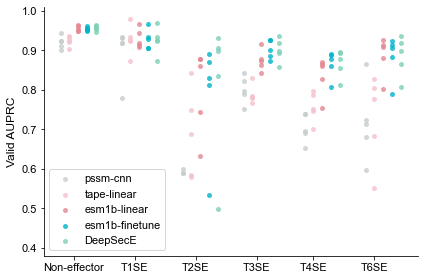

In [4]:
fig = plt.figure(figsize=(6,4))
ax = fig.gca()
ax.set_ylim([0.38,1.01])

current_x = 0
for label in labels:
    for model_name in ['pssm-cnn', 'tape-linear', 'esm1b-linear', 'esm1b-finetune', 'DeepSecE']:
        color = model_to_color[model_name]
        data = valid_results[model_name].loc[valid_results[model_name]['Label'] == label, 'AUPRC'].values
        if label == 'T6SE':
            ax.scatter([current_x]*len(data), data, alpha=0.8,
                  color=color, linewidth=0, s=25, label=model_name)
        else:
            ax.scatter([current_x]*len(data), data, alpha=0.8,
                  color=color, linewidth=0, s=25)
        current_x += 1
    current_x += 2
    
       
sns.despine()
    
ticks = np.arange(1, 37, 7, dtype=float) + 0.5
ticks[-2] = ticks[-2] - .5
ticks[-1] = 36
plt.xticks(ticks=ticks, labels=labels)
plt.ylabel('Valid AUPRC')
plt.tight_layout()
plt.legend()
plt.savefig("pdf/allmodel_valid_AUPRC_comparison.pdf")
plt.show()


Display overall metrics in cross-validation or independent test.

In [5]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score, average_precision_score, confusion_matrix, matthews_corrcoef
pd.options.display.float_format = '{:.4f}'.format

def one_hot_encoding(y, num_class=6):
    return np.eye(num_class)[y]

def sensitivity_score(y_true,y_pred):
    cm=confusion_matrix(y_true, y_pred)
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    Sensitivity = TP/(TP+FN)    
    return np.mean(Sensitivity)

def specificity_score(y_true,y_pred):
    cm=confusion_matrix(y_true, y_pred)
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    Specificity = TN/(TN+FP)    
    return np.mean(Specificity)


df = pd.DataFrame({'Model': [], 'Accuracy': [], 'Sensitivity': [], 'Specificity': [],
                   'Precision': [], 'F1-score': [], 'MCC': [], 'AUC': [], 'AUPRC': []})

for model_name in ['pssm-cnn', 'tape-linear', 'esm1b-linear', 'esm1b-finetune', 'DeepSecE']:
    mode = 'test'
    # mode = 'valid'
    labels = ['Non-effector', 'T1SE', 'T2SE', 'T3SE', 'T4SE', 'T6SE']

    for idx in range(5):
        y = np.load(f'{model_name}/y_{mode}_{idx+1}.npy')
        pred = np.load(f'{model_name}/pred_{mode}_{idx+1}.npy')
        prob = np.load(f'{model_name}/prob_{mode}_{idx+1}.npy')
        accuracy = accuracy_score(y, pred)
        f1 = f1_score(y, pred, average="macro")
        precision = precision_score(y, pred, average="macro")
        sensitivity = sensitivity_score(y, pred)
        specificity = specificity_score(y, pred)
        mcc = matthews_corrcoef(y, pred)

        y_one_hot = one_hot_encoding(y)
        auc = roc_auc_score(y_one_hot, prob, average="macro", multi_class='ovr')
        auprc = average_precision_score(y_one_hot, prob, average="macro")

        df = df.append({'Model': model_name, 'Accuracy': accuracy, 'Sensitivity': sensitivity, 'Specificity': specificity,
                            'Precision': precision, 'F1-score': f1, 'MCC': mcc, 'AUC': auc, 'AUPRC': auprc},
                           ignore_index=True)
display(df.groupby('Model').agg(['mean', 'std']))


Accuracy        Sensitivity        Specificity         \
                   mean    std        mean    std        mean    std   
Model                                                                  
DeepSecE         0.8977 0.0089      0.8816 0.0186      0.9777 0.0025   
esm1b-finetune   0.8500 0.0119      0.8644 0.0210      0.9691 0.0025   
esm1b-linear     0.8700 0.0173      0.8330 0.0110      0.9719 0.0033   
pssm-cnn         0.8215 0.0206      0.7371 0.0252      0.9590 0.0032   
tape-linear      0.8377 0.0169      0.8061 0.0222      0.9664 0.0025   

               Precision        F1-score           MCC           AUC         \
                    mean    std     mean    std   mean    std   mean    std   
Model                                                                         
DeepSecE          0.8338 0.0082   0.8491 0.0095 0.8455 0.0123 0.9856 0.0018   
esm1b-finetune    0.7810 0.0184   0.8075 0.0151 0.7853 0.0159 0.9826 0.0035   
esm1b-linear      0.8064 0.0177   0.8103 0.0158 0.8034 0.0233 0.9839 0.0016   
pssm-cnn          0.7259 0.0296   0.7236 0.0248 0.7256 0.0270 0.9496 0.0065   
tape-linear       0.7515 0.0211   0.7697 0.0197 0.7602 0.0202 0.9718 0.0037   

                AUPRC         
                 mean    std  
Model                         
DeepSecE       0.8850 0.0096  
esm1b-finetune 0.8831 0.0097  
esm1b-linear   0.8714 0.0100  
pssm-cnn       0.7737 0.0088  
tape-linear    0.8218 0.0118

Dotplot showing average accuracy, F1-score, and AUPRC with 95% CI.

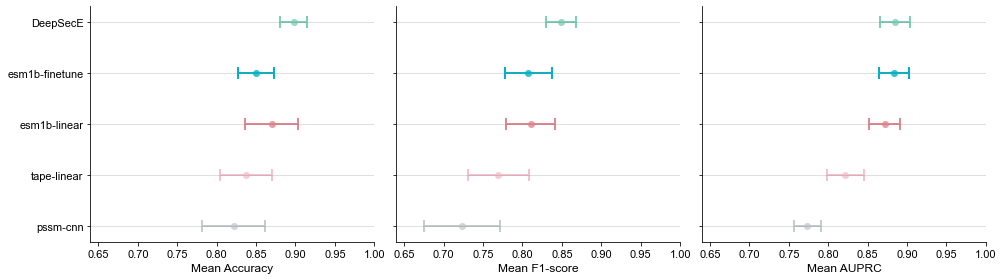

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

model_names = ['pssm-cnn','tape-linear', 'esm1b-linear', 'esm1b-finetune', 'DeepSecE']

for idx, metric in enumerate(['Accuracy', 'F1-score', 'AUPRC']):
    for i, model_name in enumerate(model_names):
        color = model_to_color[model_name]
        mean_auc = df.groupby('Model').agg(['mean', 'std']).loc[model_name,  metric]['mean']
        std_auc = df.groupby('Model').agg(
            ['mean', 'std']).loc[model_name,  metric]['std']
        ci_lower = mean_auc - 1.96 * std_auc
        ci_upper = mean_auc + 1.96 * std_auc
        axes[idx].plot([ci_lower, ci_lower], [i-0.1, i+0.1], linewidth=2, color=color)
        axes[idx].plot([ci_upper, ci_upper], [i-0.1, i+0.1], linewidth=2, color=color)
        axes[idx].plot([ci_lower, ci_upper], [i,i], linewidth=2, color=color)
        
        axes[idx].scatter(mean_auc, i, alpha=0.8, color=color, linewidth=0, s=50)
        axes[idx].axhline(i, alpha=0.5, color='gray', linewidth=0.5)
    
    if idx == 0:
        axes[idx].set_yticks(range(len(model_names)))
        axes[idx].set_yticklabels(model_names)
    else:
        axes[idx].set_yticklabels([])

    axes[idx].set_xlim([.64, 1])
    axes[idx].set_xlabel(f'Mean {metric}')

sns.despine()

plt.tight_layout()
plt.savefig("pdf/allmodel_test.pdf")
plt.show()
